In [65]:
import os, sys, importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [66]:
# Common paths
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULE_PATH = os.path.join(BASE_PATH, "modules")
DS_PATH = os.path.join(BASE_PATH, "datasets")

In [67]:
sys.path.append(MODULE_PATH)

import mp.MomentPropagation as mp
importlib.reload(mp)

import data.mnist as mnist_loader
importlib.reload(mnist_loader)

<module 'data.mnist' from '/home/exleonem/Desktop/workspace/thesis/wp/notebooks/model/../../modules/data/mnist.py'>

## Prepare MNIST Data

In [195]:
mnist_path = os.path.join(DS_PATH, "mnist")
inputs, targets = mnist_loader.load(mnist_path)

In [196]:
selector = (targets==0) | (targets==1)

In [197]:
new_inputs = inputs[selector].astype("float32")/255.0
new_targets = targets[selector]

In [198]:
in_shape = new_inputs.shape
new_inputs = new_inputs.reshape(in_shape[0], 28, 28, 1)

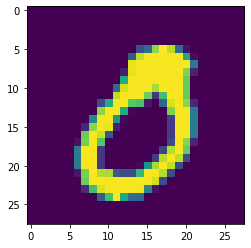

In [199]:
plt.imshow(new_inputs[20])

In [200]:
x_train, x_test, y_train, y_test = train_test_split(new_inputs, new_targets)

In [205]:
print("Train-shape: ", x_train.shape, x_train.dtype)
print("Test-shape: ", x_test.shape, x_test.dtype)

Train-shape:  (11085, 28, 28, 1) float32
Test-shape:  (3695, 28, 28, 1) float32


# Perform moment propagation

In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPool2D, Dropout, Flatten, Dense, Softmax

In [140]:
gpus = tf.config.experimental.list_physical_devices("GPU")
cpus = tf.config.experimental.list_physical_devices("CPU")

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            
        logical_gpus = tf.config.experimental.list_logical_devices("GPU")
        print(len(gpus), "Physical GPU's, ", len(logical_gpus), "Logical GPU's")
        
    except RuntimeError as e:
        print(e)
        
elif cpus:
    try:
        logical_cpus = tf.config.experimental.list_logical_devices("CPU")
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
        
    except RuntimeError as e:
        print(e)
        
        
tfk = tf.keras

1 Physical CPU, 1 Logical CPU


In [218]:
tfk.backend.clear_session()
input_shape = (28, 28, 1)
USE_BN = True

In [221]:
input_shape = (28, 28, 1)
model = Sequential([
    Conv2D(128, 4,activation="relu", input_shape=input_shape),
    MaxPool2D(),
    Dropout(.2),
    Conv2D(64, 3, activation="relu"),
    MaxPool2D(),
    Dropout(.2),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10),
    Softmax()
])

model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 128)       2176      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [222]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10
)

Epoch 1/10
174/174 [==============================] - 7s 41ms/step - loss: 0.2162 - accuracy: 0.9594
Epoch 2/10
174/174 [==============================] - 7s 42ms/step - loss: 0.0041 - accuracy: 0.9985
Epoch 3/10
174/174 [==============================] - 7s 40ms/step - loss: 0.0020 - accuracy: 0.9991
Epoch 4/10
134/174 [======================>.......] - ETA: 1s - loss: 0.0027 - accuracy: 0.9992

KeyboardInterrupt: 

In [ ]:
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
